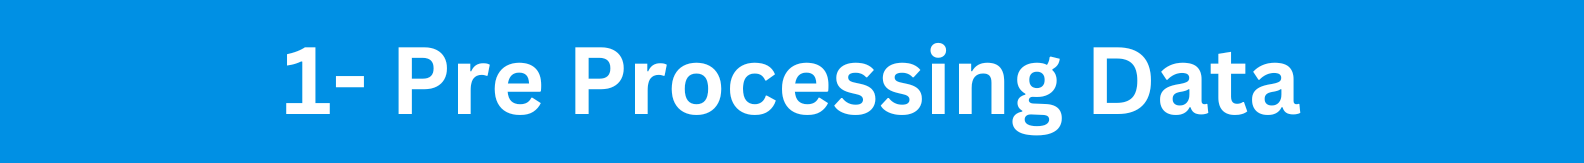

In [1]:
# This is for to remove "RGB" error
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings("ignore", message=".*iCCP: known incorrect sRGB profile.*")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Now we have to import the dataset

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

# Now we have to set images in a same size

In [4]:
img_width = 180
img_height = 180

# Now we have to convert the images to arrays

# 1- train data

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size = (img_width,img_height),
    batch_size = 32,
    shuffle = True,
    validation_split=False)

Found 3115 files belonging to 36 classes.


Let's see the 36 types of classes

In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

# 2- validation data

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width,img_height),
    batch_size = 32,
    shuffle = False,
    validation_split=False)

Found 351 files belonging to 36 classes.


# 3- test data

In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width,img_height),
    batch_size = 32,
    shuffle = False,
    validation_split=False)

Found 359 files belonging to 36 classes.


# Now we print some of our data (images)

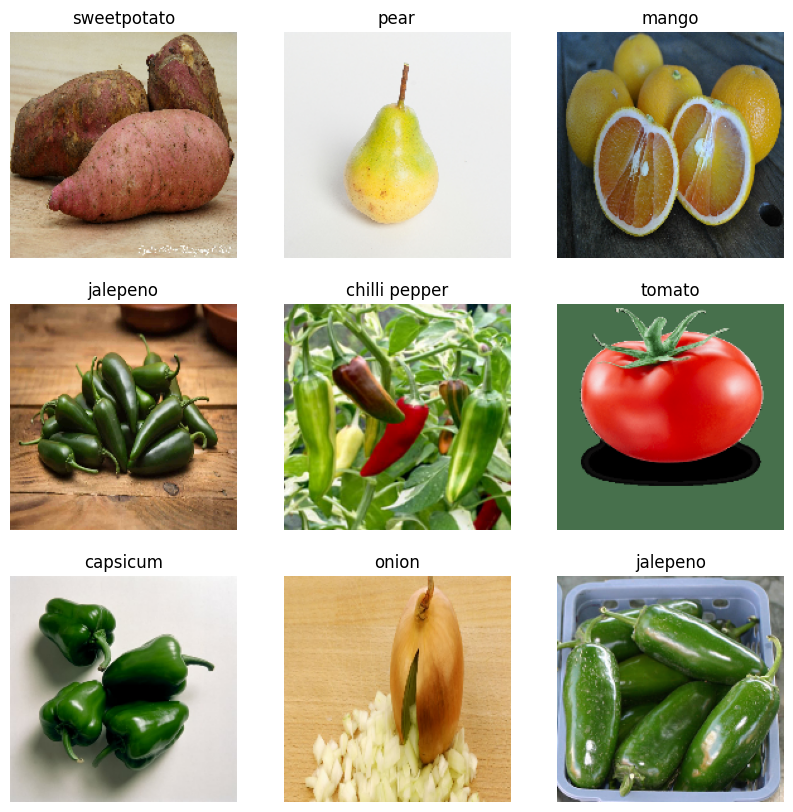

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

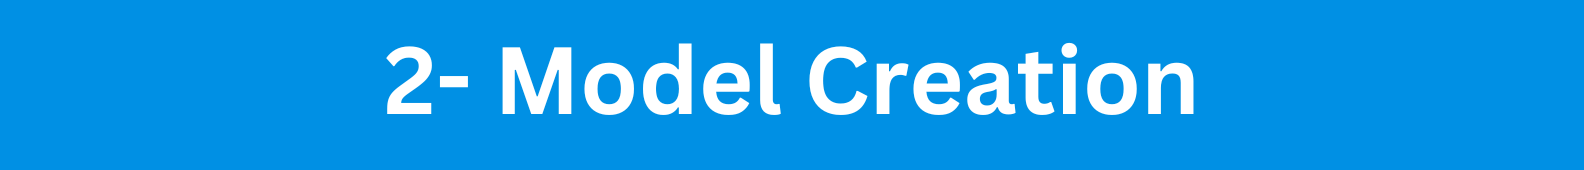

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

# Our model is created, now we have to compile

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Let's fit the model

In [15]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 70s 673ms/step - loss: 3.5810 - accuracy: 0.0639 - val_loss: 2.6960 - val_accuracy: 0.2650
Epoch 2/25
98/98 [==============================] - 62s 591ms/step - loss: 2.5856 - accuracy: 0.2812 - val_loss: 1.5020 - val_accuracy: 0.6410
Epoch 3/25
98/98 [==============================] - 59s 566ms/step - loss: 1.7309 - accuracy: 0.5136 - val_loss: 0.9299 - val_accuracy: 0.8063
Epoch 4/25
98/98 [==============================] - 72s 700ms/step - loss: 1.0319 - accuracy: 0.7133 - val_loss: 0.6107 - val_accuracy: 0.8775
Epoch 5/25
98/98 [==============================] - 68s 649ms/step - loss: 0.5834 - accuracy: 0.8360 - val_loss: 0.4731 - val_accuracy: 0.9145
Epoch 6/25
98/98 [==============================] - 63s 603ms/step - loss: 0.4029 - accuracy: 0.8957 - val_loss: 0.3330 - val_accuracy: 0.9316
Epoch 7/25
98/98 [==============================] - 63s 609ms/step - loss: 0.2582 - accuracy: 0.9416 - val_loss: 0.4272 - val_accuracy: 0.9487

# Let's see the deeffernce between Training Accuracy dataset & Validation Accuracy

Text(0.5, 1.0, 'Loss')

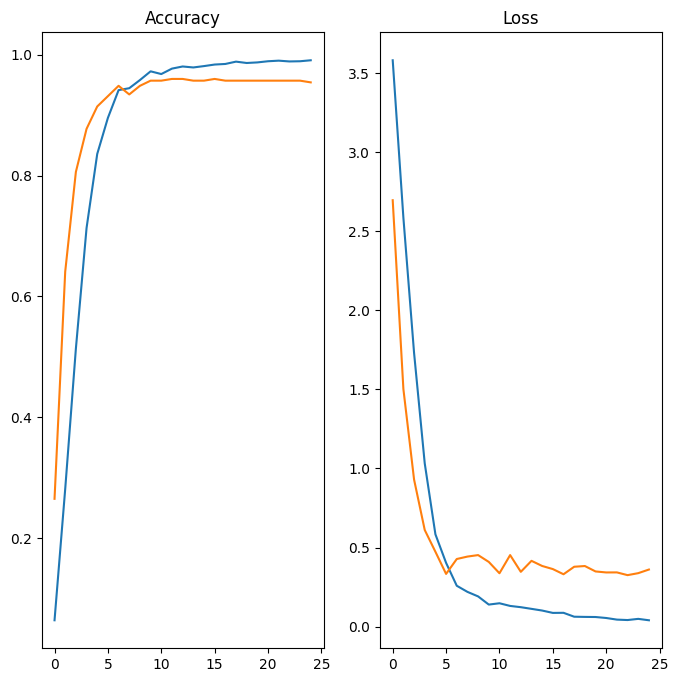

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

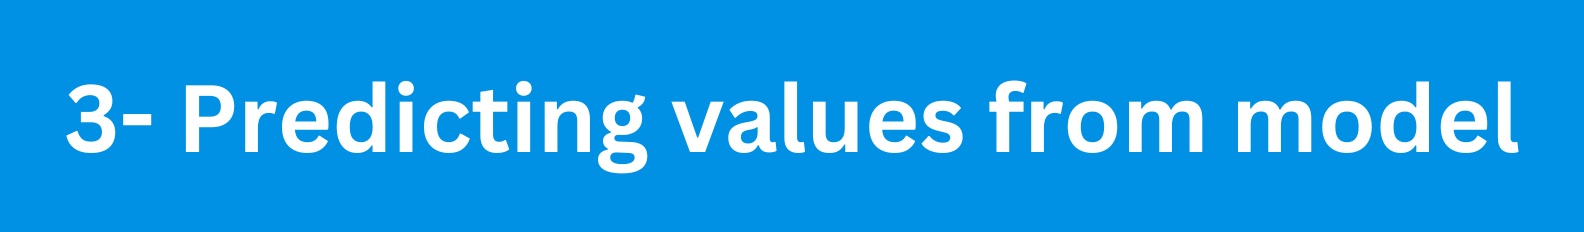

In [17]:
image = 'Banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 112ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 67.34


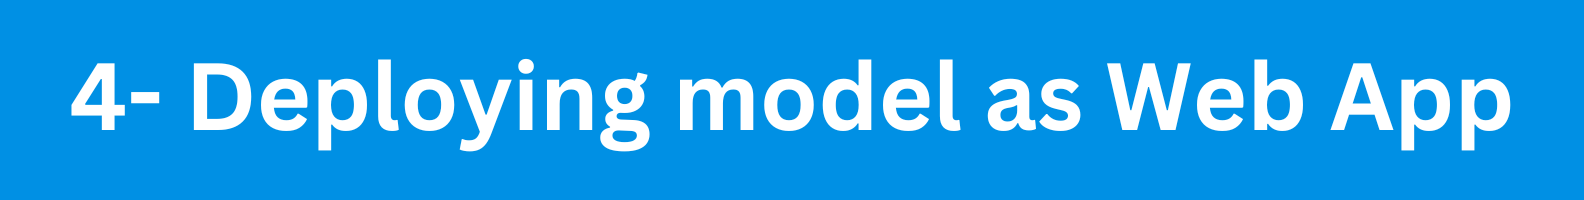

In [21]:
model.save('Image_classify.keras')

Now go to VS code